<a href="https://colab.research.google.com/github/AndrewZou/Chat-GPT-dev/blob/main/Power_Market_Demand_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Power Demand Model MAE: 9.920554643236155
Price Model MAE: 4.166414927929076


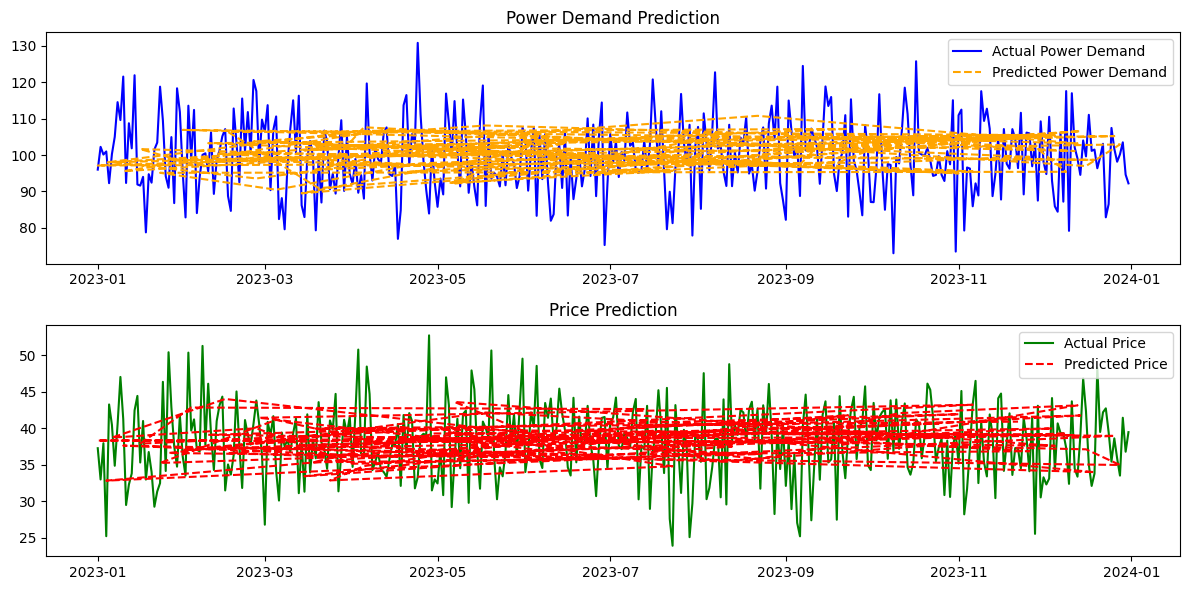

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Generate synthetic data for the example
np.random.seed(42)
n_samples = 365  # Number of days
dates = pd.date_range('2023-01-01', periods=n_samples)
weather_data = np.random.normal(loc=25, scale=5, size=n_samples)  # Temperature in Celsius
power_demand = np.random.normal(loc=100, scale=10, size=n_samples)  # Power demand in MW
price = 50 - 0.5 * weather_data + np.random.normal(scale=5, size=n_samples)  # Price in $/MWh

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Temperature': weather_data, 'PowerDemand': power_demand, 'Price': price})

# Feature engineering: Extracting day of week and month from the date
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Split the data into training and testing sets
X = df[['Temperature', 'DayOfWeek', 'Month']]
y_demand = df['PowerDemand']
y_price = df['Price']

X_train, X_test, y_demand_train, y_demand_test, y_price_train, y_price_test = train_test_split(
    X, y_demand, y_price, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor for power demand prediction
demand_model = RandomForestRegressor(n_estimators=100, random_state=42)
demand_model.fit(X_train, y_demand_train)

# Train another Random Forest Regressor for price prediction
price_model = RandomForestRegressor(n_estimators=100, random_state=42)
price_model.fit(X_train, y_price_train)

# Make predictions on the test set
demand_pred = demand_model.predict(X_test)
price_pred = price_model.predict(X_test)

# Evaluate the models
demand_mae = mean_absolute_error(y_demand_test, demand_pred)
price_mae = mean_absolute_error(y_price_test, price_pred)

print(f"Power Demand Model MAE: {demand_mae}")
print(f"Price Model MAE: {price_mae}")

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['Date'], y_demand, label='Actual Power Demand', color='blue')
plt.plot(df.loc[X_test.index, 'Date'], demand_pred, label='Predicted Power Demand', linestyle='dashed', color='orange')
plt.title('Power Demand Prediction')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Date'], y_price, label='Actual Price', color='green')
plt.plot(df.loc[X_test.index, 'Date'], price_pred, label='Predicted Price', linestyle='dashed', color='red')
plt.title('Price Prediction')
plt.legend()

plt.tight_layout()
plt.show()
